In [ ]:
import pywt
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#Download a file
from google.colab import files
img1 = files.upload()

Saving lena1.jpg to lena1.jpg


In [19]:
#Download a file
from google.colab import files
img2 = files.upload()

Saving lena2.jpg to lena2.jpg


In [20]:

# img1 = cv.resize(img1, (256,256))
img1 = cv.imread('lena1.jpg',0) #read gray image.
# img2 = cv.resize(img2, (256,256))
img2 = cv.imread('lena2.jpg',0) #read gray image.


In [21]:
#for Image 1 Lena1.jpg
coeffs2 = pywt.swt2(img1, 'db1',level=1)
coeffs2 = coeffs2[0]
LL, (LH, HL, HH) = coeffs2

In [22]:
A1L1 = np.float32(LL)
H1L1 = np.float32(LH)
V1L1 = np.float32(HL)
D1L1 = np.float32(HH)

In [24]:
#for Image 2 Lena1.jpg
coeffs2 = pywt.swt2(img2, 'db1',level=1)
coeffs2 = coeffs2[0]
LL, (LH, HL, HH) = coeffs2

In [25]:
A2L1 = np.float32(LL)
H2L1 = np.float32(LH)
V2L1 = np.float32(HL)
D2L1 = np.float32(HH)

In [26]:
AfL1 = 0.5*(A1L1+A2L1);
D=(np.abs(H1L1)-np.abs(H2L1))>=0
HfL1=np.multiply(D,H1L1)+np.multiply(np.logical_not(D),H2L1)
D=(np.abs(V1L1)-np.abs(V2L1))>=0
VfL1=np.multiply(D,V1L1)+np.multiply(np.logical_not(D),V2L1)
D=(np.abs(D1L1)-np.abs(D2L1))>=0
DfL1=np.multiply(D,D1L1)+np.multiply(np.logical_not(D),D2L1)

In [27]:
#For inverse swt2 (iswt2)
coeffs3 = AfL1, (HfL1,VfL1,DfL1)
imf = np.uint8( pywt.iswt2(coeffs3,'db2') );


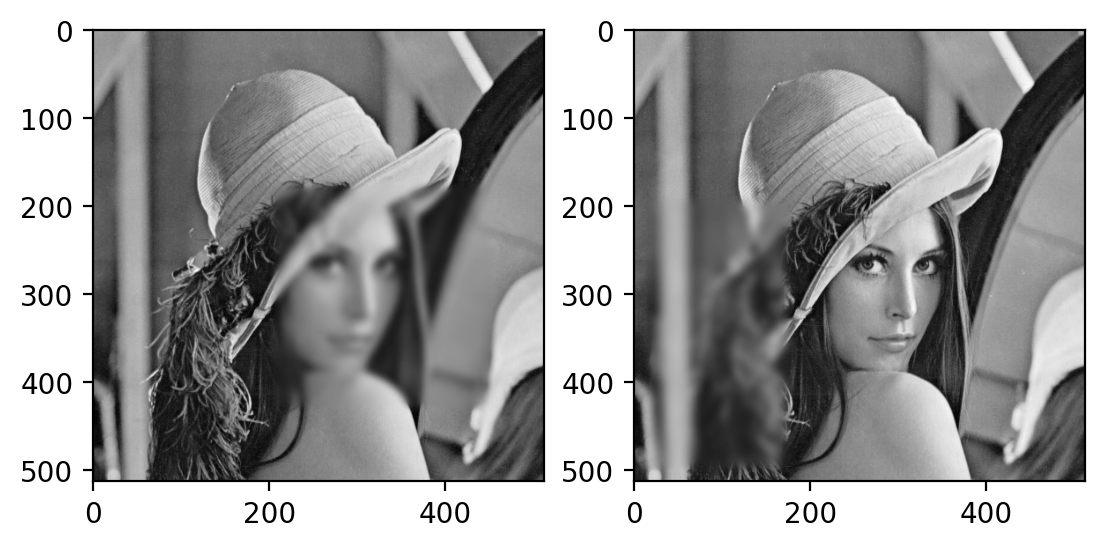

In [28]:
#Display images
plt.figure(dpi=200)
plt.subplot(121)
plt.imshow(img1,cmap = 'gray')
plt.subplot(122)
plt.imshow(img2,cmap = 'gray')
plt.savefig('inputs.png',dpi=200)
plt.show()

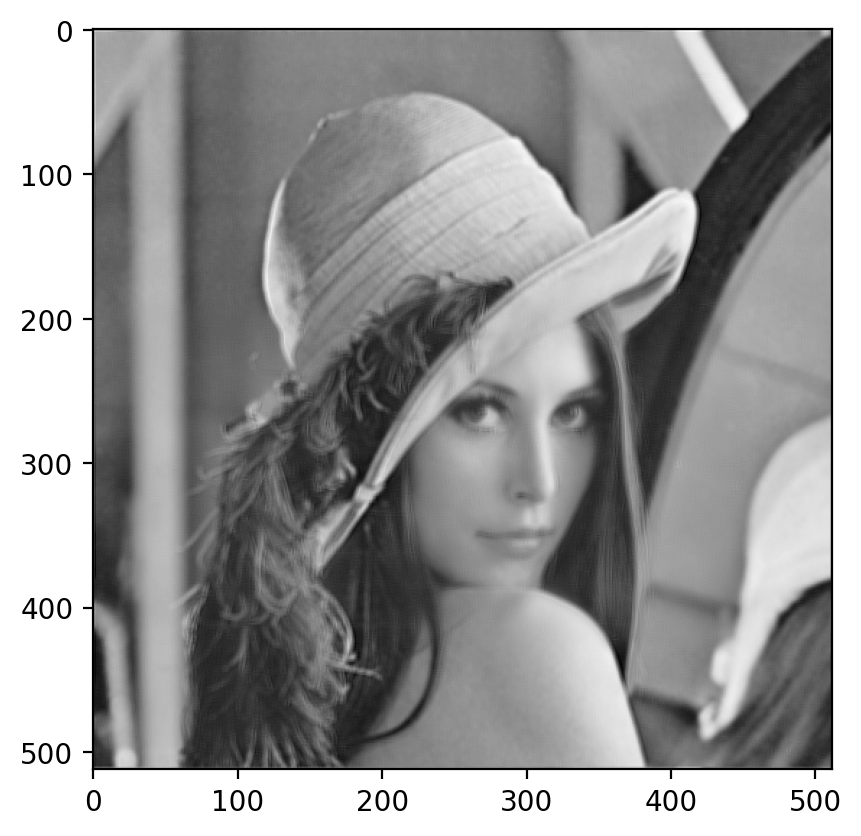

In [29]:
plt.figure(dpi=200)
plt.imshow(imf,cmap = 'gray')
plt.savefig('output.png')
plt.show()